In [45]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [46]:
df=pd.read_csv("https://raw.githubusercontent.com/mrbarron3/stat451/main/loan_data.csv")
df=pd.read_csv("https://raw.githubusercontent.com/mrbarron3/stat451/main/loan_data.csv")
df=df.join(pd.get_dummies(df.purpose))
df=df.drop("purpose", axis=1)

In [47]:
X = df.drop('not.fully.paid', axis=1)  
y = df['not.fully.paid']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

      credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1      0.12       829.10           11.35  19.48   737   
1                 1      0.11       228.22           11.08  14.29   707   
2                 1      0.14       366.86           10.37  11.63   682   
3                 1      0.10       162.34           11.35   8.10   712   
4                 1      0.14       102.92           11.30  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0      0.15       344.76           12.18  10.39   672   
9574              0      0.13       257.70           11.14   0.21   722   
9575              0      0.11        97.81           10.60  13.09   687   
9576              0      0.16       351.58           10.82  19.18   692   
9577              0      0.14       853.43           11.26  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0               5639

   model  MSE_train  MSE_test  .intercept_ .coef_
0  Lasso       0.13      0.13         0.76  [0.0]


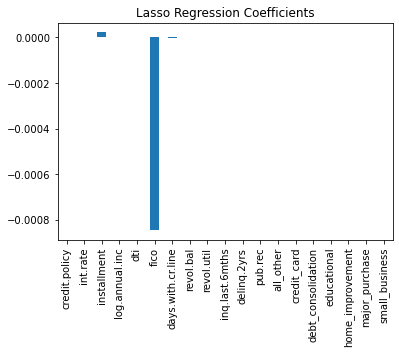

In [61]:
lasso_reg = linear_model.Lasso()

lasso_reg.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred = lasso_reg.predict(X_test)

# Evaluate the model
MSE_train = (1/y_train.size) * np.sum((y_train - lasso_reg.predict(X_train))**2)
MSE_test = (1/y_test.size)  * np.sum((y_test - lasso_reg.predict(X_test))**2)

df = pd.DataFrame(columns=['model', 'MSE_train', 'MSE_test', '.intercept_', '.coef_'])
new_row = pd.DataFrame({'model': "Lasso", 'MSE_train': MSE_train,
                                     'MSE_test': MSE_test, '.intercept_': lasso_reg.intercept_,
                                     '.coef_': [np.round(lasso_reg.coef_[1:2], 2)]})
df = pd.concat([df, new_row])
print(df)

# Plot the coefficients
coefficients = pd.Series(lasso_reg.coef_, index=X.columns)
coefficients.plot(kind='bar')
plt.title('Lasso Regression Coefficients')
plt.show()

In [65]:
ridge_reg = linear_model.Ridge()

ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

df = pd.DataFrame(columns=['model', 'MSE_train', 'MSE_test', '.intercept_', '.coef_'])
new_row = pd.DataFrame({'model': "Ridge Regression", 'MSE_train': MSE_train,
                                     'MSE_test': MSE_test, '.intercept_': ridge_reg.intercept_,
                                     '.coef_': [np.round(ridge_reg.coef_[1:2], 2)]})
df = pd.concat([df, new_row])
print(df)

              model  MSE_train  MSE_test  .intercept_ .coef_
0  Ridge Regression       0.13      0.13         1.65  [0.0]
